In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [2]:
X_train = X_train_tfidf_L1
X_test = X_test_tfidf_L1

# Basic training

In [8]:
softmax_model = LogisticRegression(multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9321
	- Micro F1 score: 0.9321
	- Macro F1 score: 0.9005
Score of on test are:
	- Accuracy score: 0.8405
	- Micro F1 score: 0.8405
	- Macro F1 score: 0.7796


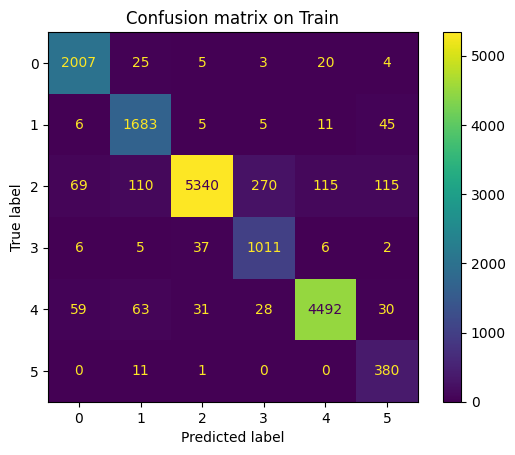

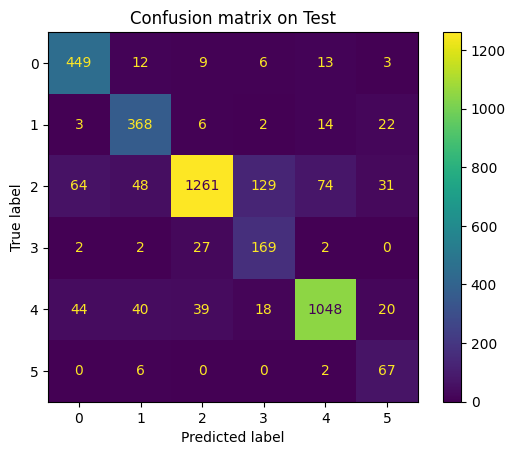

In [9]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

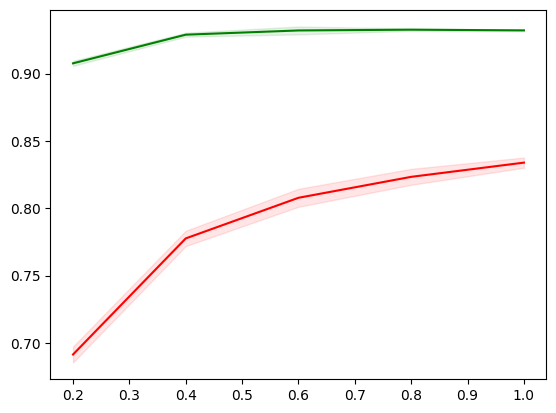

In [10]:
draw_learning_curve(softmax_model, X_train, y_train)

# Multiple tuning

## No regularization

In [11]:
softmax_model = LogisticRegression(penalty=None, solver='lbfgs', multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty=None)

Score of on train are:
	- Accuracy score: 0.9859
	- Micro F1 score: 0.9859
	- Macro F1 score: 0.9818
Score of on test are:
	- Accuracy score: 0.8600
	- Micro F1 score: 0.8600
	- Macro F1 score: 0.8235


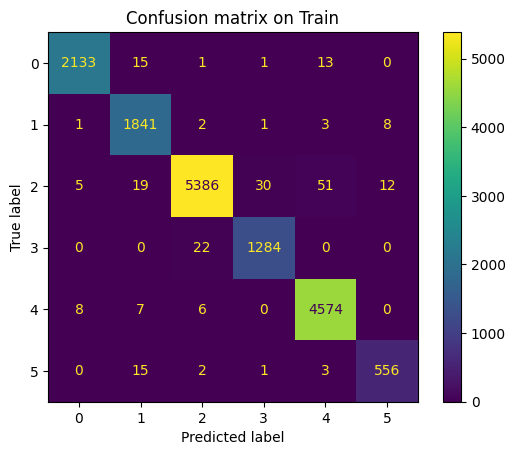

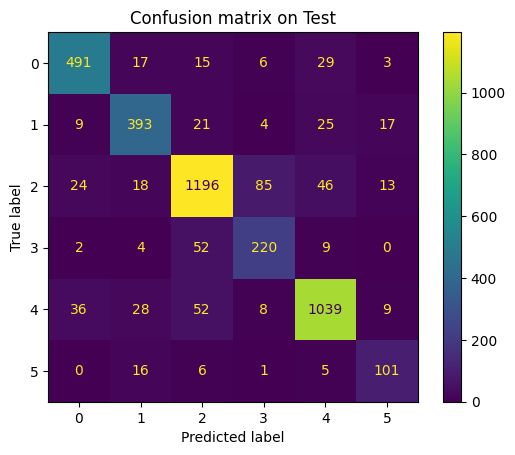

In [12]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

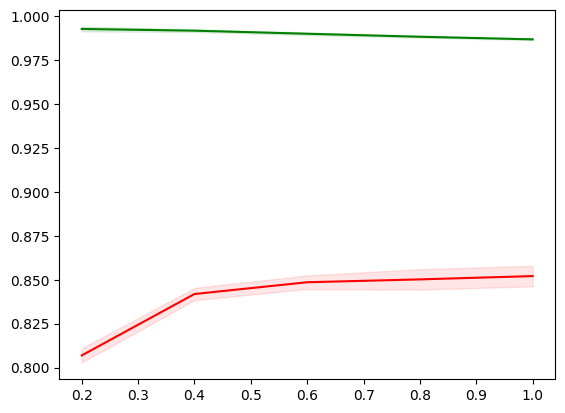

In [13]:
draw_learning_curve(softmax_model, X_train, y_train)

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [3]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.3386875, 0.653875, 0.881125, 0.973625, 0.9856875, 0.9860625]
[0.32900000000000007, 0.3386875000000001, 0.49975, 0.8605, 0.8664375, 0.8651249999999999, 0.85825]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

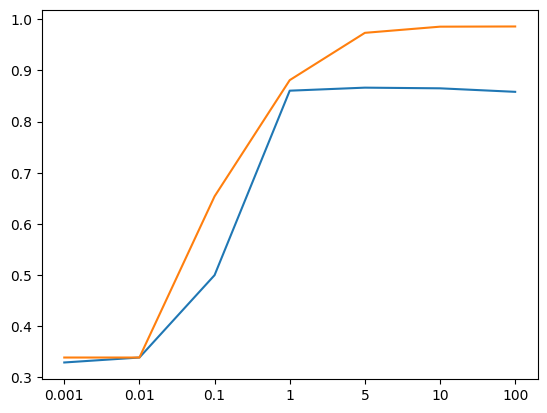

In [4]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 5$, then we scope to $C=5$:

In [ ]:
C_list = [2, 3, 4, 4.5, 5, 5.5, 6, 7]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[2, 3, 4, 4.5, 5, 5.5, 6, 7]
[0.90175, 0.9318125, 0.958125, 0.9668125, 0.9736875, 0.978375, 0.9811875, 0.984]
[0.8666874999999999, 0.8668125, 0.867, 0.86675, 0.866625, 0.8661875, 0.8659375, 0.8661249999999999]


[Text(0, 0, '2'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '4.5'),
 Text(4, 0, '5'),
 Text(5, 0, '5.5'),
 Text(6, 0, '6'),
 Text(7, 0, '7')]

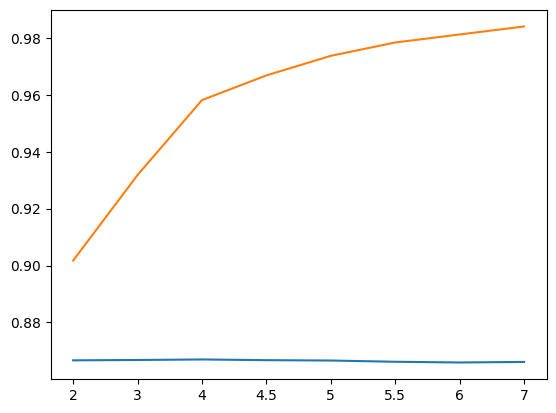

In [ ]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

The valid scores are almost the same at each value, but we will choose the value with lowest train score for generaliztion.

We choose $C=2$ to be the best model.

In [13]:
best_l1_softmax_model = LogisticRegression(C=2, penalty='l1', solver='saga', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9018
	- Micro F1 score: 0.9018
	- Macro F1 score: 0.8680
Score of on test are:
	- Accuracy score: 0.8690
	- Micro F1 score: 0.8690
	- Macro F1 score: 0.8305


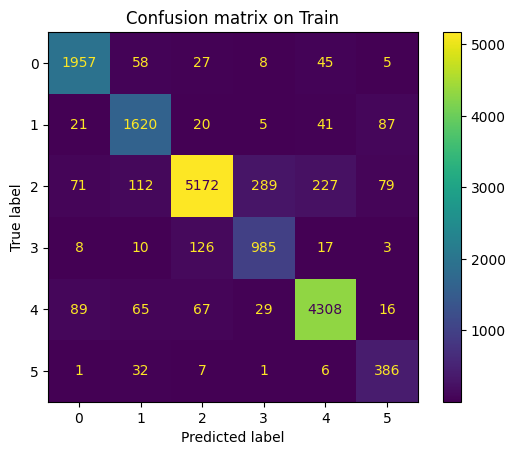

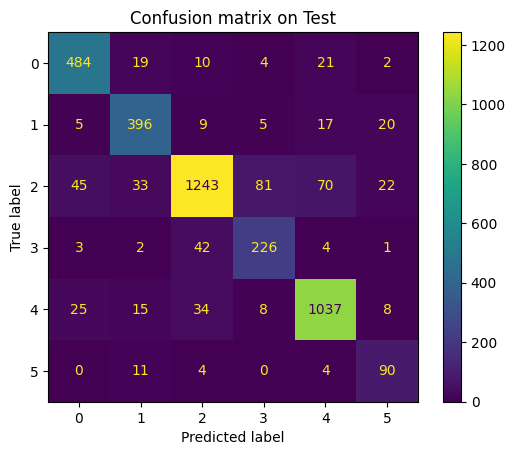

In [14]:
best_l1_softmax_model.fit(X_train, y_train)
evaluate_model(best_l1_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

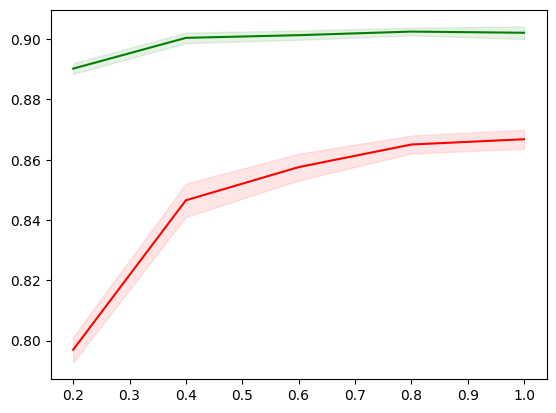

In [15]:
draw_learning_curve(best_l1_softmax_model, X_train, y_train)

## L2 regularization

In [16]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100, 200]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100, 200]
[0.3386875, 0.426125, 0.714875, 0.9320625, 0.981875, 0.9843125, 0.98575, 0.9859375]
[0.3386875000000001, 0.38587499999999997, 0.6554375, 0.8338750000000001, 0.8555624999999999, 0.8558749999999999, 0.857, 0.8572500000000002]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100'),
 Text(7, 0, '200')]

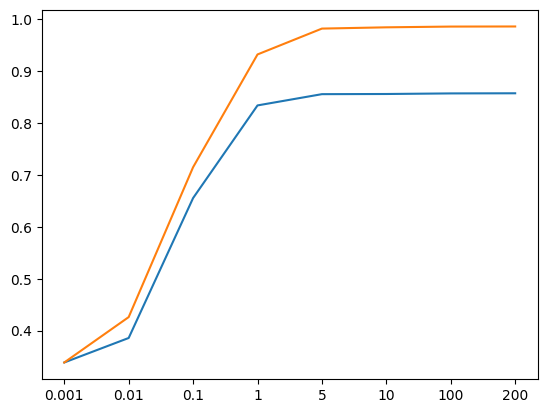

In [17]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 5$, then we scope to $C=5$:

In [18]:
C_list = [1, 3, 4, 4.5, 5, 5.5, 6, 7, 10]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[1, 3, 4, 4.5, 5, 5.5, 6, 7, 10]
[0.9320625, 0.9741875, 0.978625, 0.9798125, 0.981875, 0.9825, 0.9829375, 0.9831875, 0.9843125]
[0.8338750000000001, 0.8523125, 0.8544375000000001, 0.8553749999999999, 0.8555624999999999, 0.8554999999999999, 0.8570625, 0.856625, 0.8558749999999999]


[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '4.5'),
 Text(4, 0, '5'),
 Text(5, 0, '5.5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '10')]

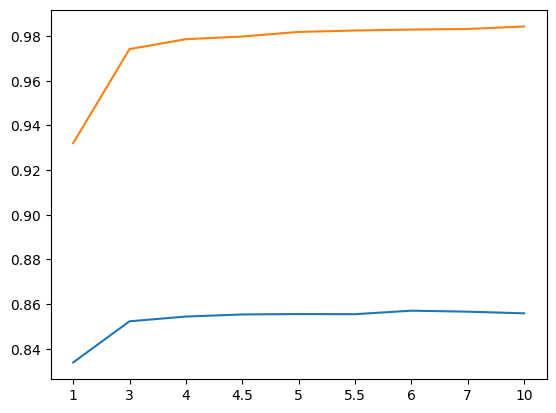

In [19]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

Same with L1 regularization, the valid scores are almost the same at each value, but we will choose the value with lowest train score for generaliztion.

We choose $C=3$ to be the best model.

In [20]:
best_l2_softmax_model = LogisticRegression(C=3, penalty='l2', solver='lbfgs', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9742
	- Micro F1 score: 0.9742
	- Macro F1 score: 0.9628
Score of on test are:
	- Accuracy score: 0.8585
	- Micro F1 score: 0.8585
	- Macro F1 score: 0.8099


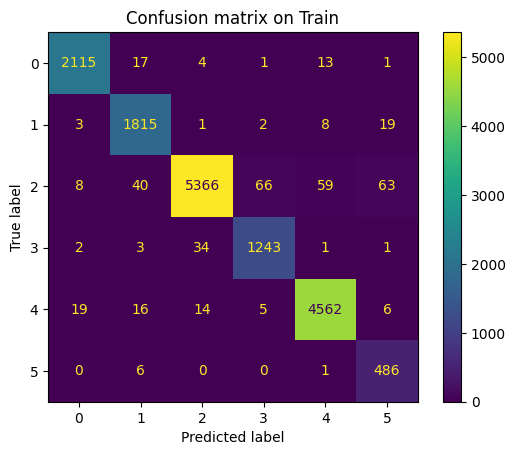

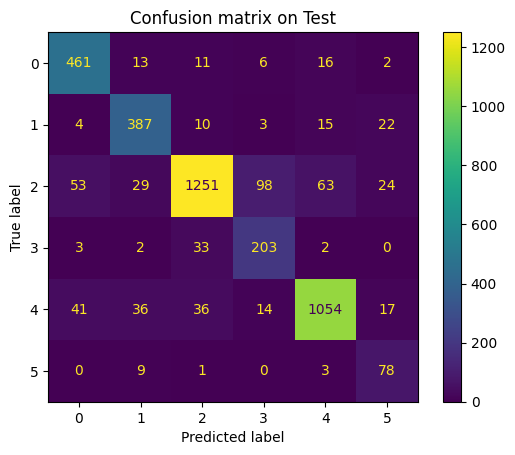

In [21]:
best_l2_softmax_model.fit(X_train, y_train)
evaluate_model(best_l2_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

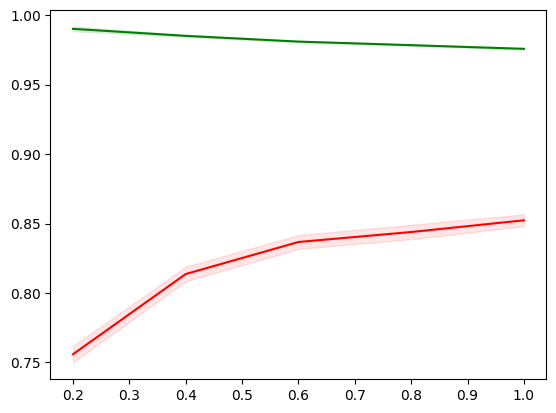

In [22]:
draw_learning_curve(best_l2_softmax_model, X_train, y_train)

## Elastic regularization

In [5]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [6]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

Bad hyperparameter:
C 0.001
C 0.01
C 0.1


In [7]:
dict_param = {
    'C' : np.logspace(0, 2, 5),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [8]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0     1.000000       0.1  0.838875
1     1.000000       0.3  0.845063
2     1.000000       0.5  0.850125
3     1.000000       0.7  0.853313
4     1.000000       0.9  0.860063
5     3.162278       0.1  0.856000
6     3.162278       0.3  0.860375
7     3.162278       0.5  0.864375
8     3.162278       0.7  0.866312
9     3.162278       0.9  0.868938
10   10.000000       0.1  0.858500
11   10.000000       0.3  0.860250
12   10.000000       0.5  0.863250
13   10.000000       0.7  0.864375
14   10.000000       0.9  0.864750
15   31.622777       0.1  0.856562
16   31.622777       0.3  0.858250
17   31.622777       0.5  0.859875
18   31.622777       0.7  0.861062
19   31.622777       0.9  0.861063
20  100.000000       0.1  0.854937
21  100.000000       0.3  0.856000
22  100.000000       0.5  0.855875
23  100.000000       0.7  0.857688
24  100.000000       0.9  0.857563


In [9]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(C=3.1622776601683795, l1_ratio=0.9,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga') 0.8689375


In [23]:
best_en_softmax_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.9,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

Score of on train are:
	- Accuracy score: 0.9349
	- Micro F1 score: 0.9349
	- Macro F1 score: 0.9125
Score of on test are:
	- Accuracy score: 0.8685
	- Micro F1 score: 0.8685
	- Macro F1 score: 0.8276


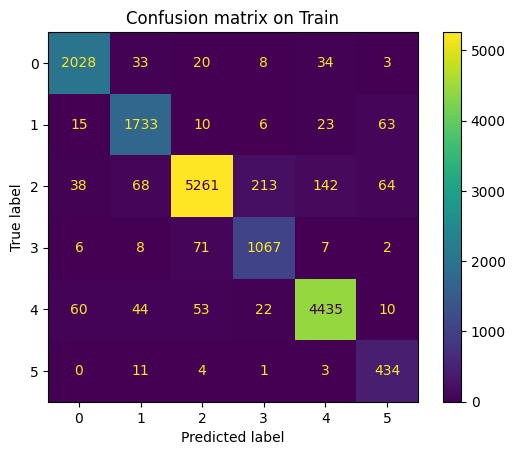

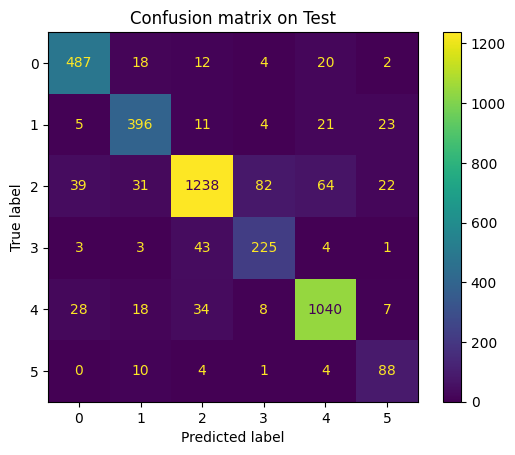

In [24]:
best_en_softmax_model.fit(X_train, y_train)
evaluate_model(best_en_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

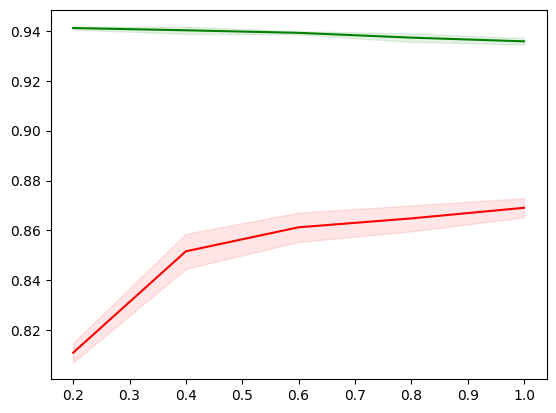

In [25]:
draw_learning_curve(best_en_softmax_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [26]:
best_softmax_model = best_l1_softmax_model

In [27]:
directory = "data/models/softmax/"

dump(best_softmax_model, directory + "best_softmax_tfidf_l1_model.joblib")

['data/models/softmax/best_softmax_tfidf_l1_model.joblib']